# How fuel efficient is the Bay Area Rapid Transit system?

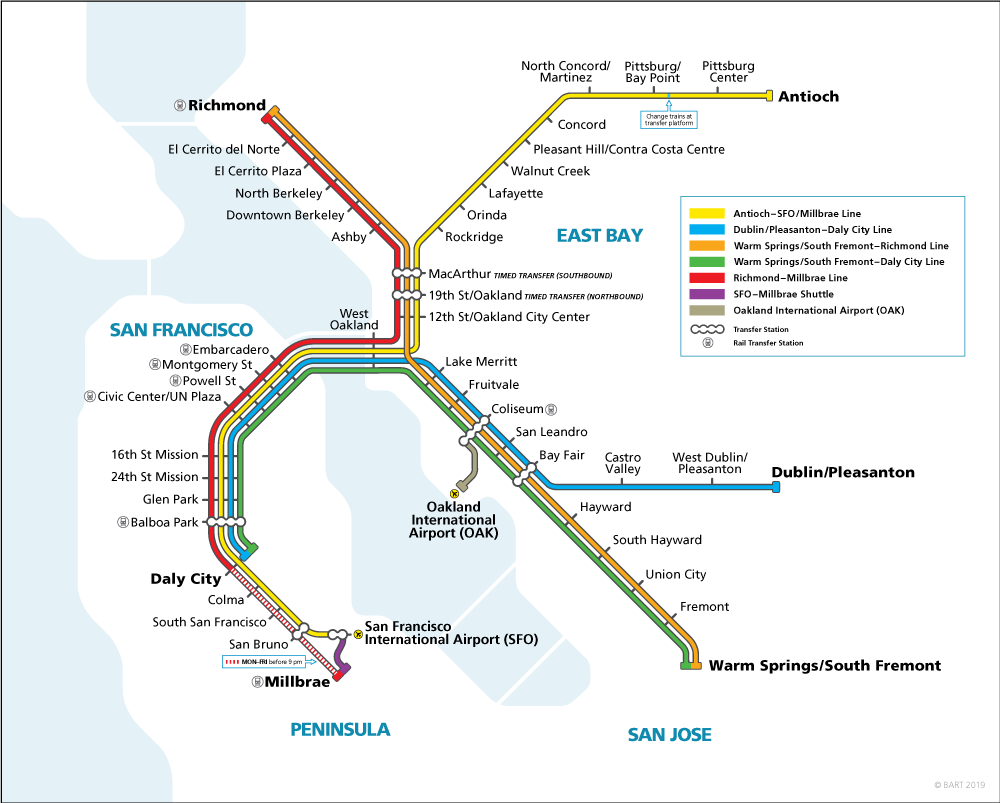

In [1]:
from IPython.display import Image
Image(filename = '/Users/gavincleach/BART-map.png', width = 995, height = 799)

In this project, we will examine the ridership data provided by bart.gov. This data shows all of the 'trips' (entrance of one station, and out another) that paying riders took throughout the years. This data can be helpful for analyzing the carbon footprint of the BART because it shows how many people it transports on the daily. If we know how many miles individuals are transported, and how much energy is used for this transportation we can compare this fuel efficiency to other methods of transportation.

To explain the metric we will be measuring, we will consider a simple example...

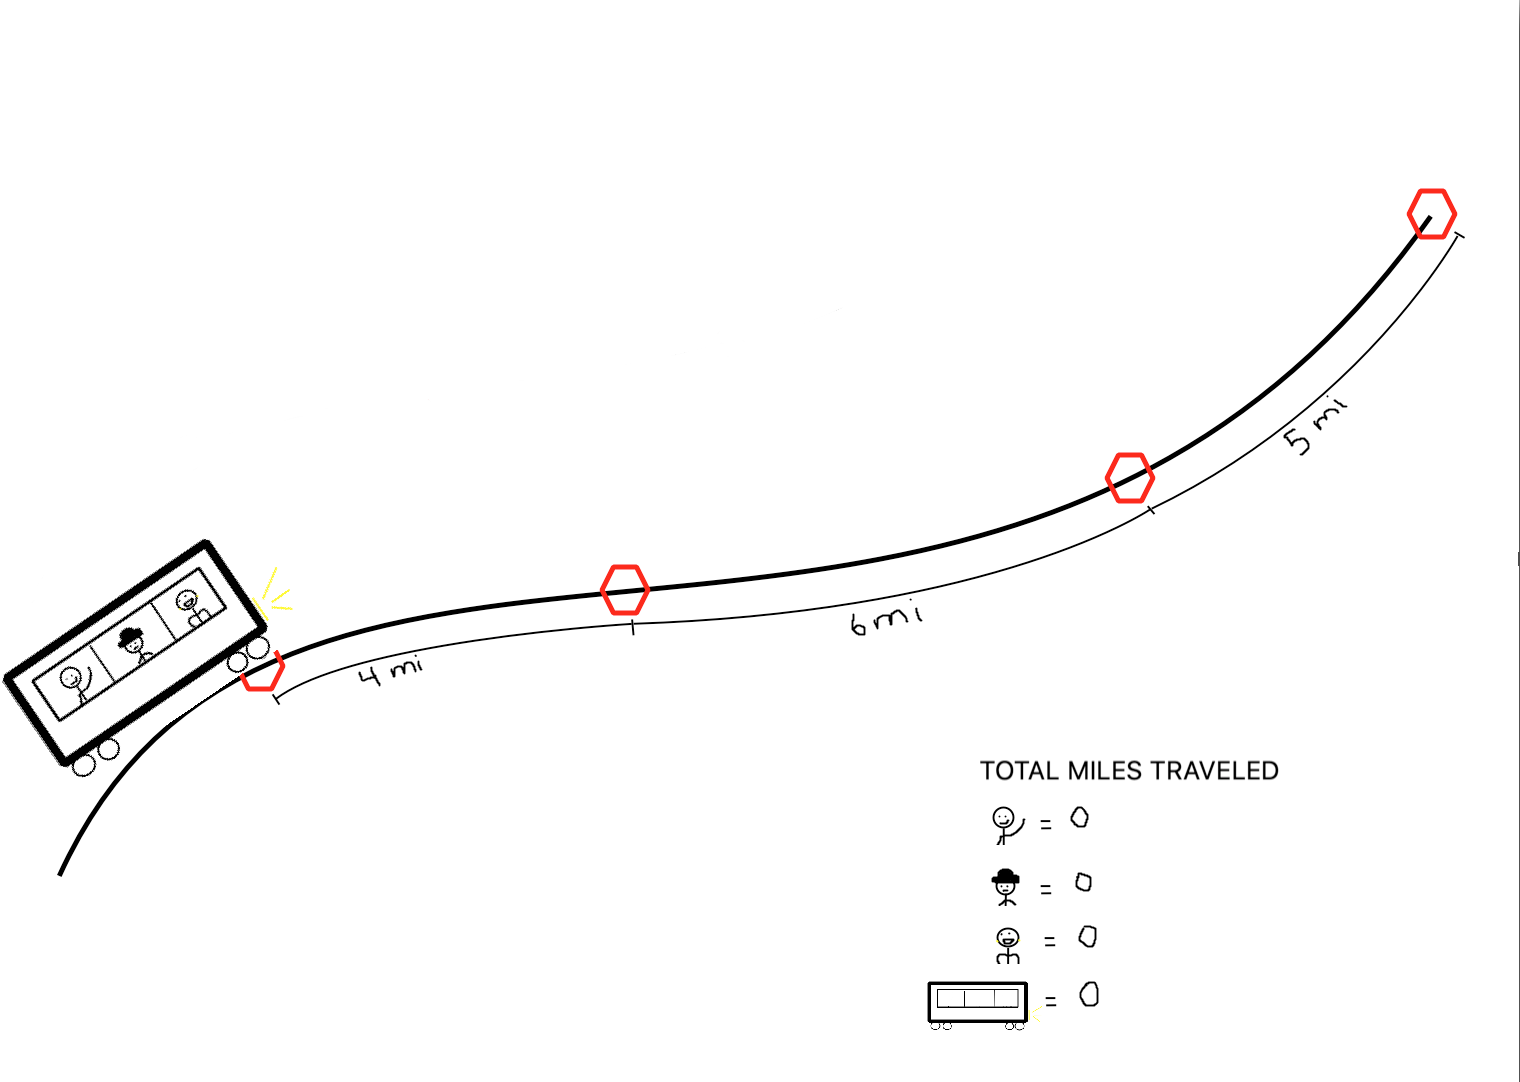

In [2]:
from IPython.display import Image
Image(filename = '/Users/gavincleach/Desktop/BART-painted-tracks/track_0.png', width = 700, height = 500)

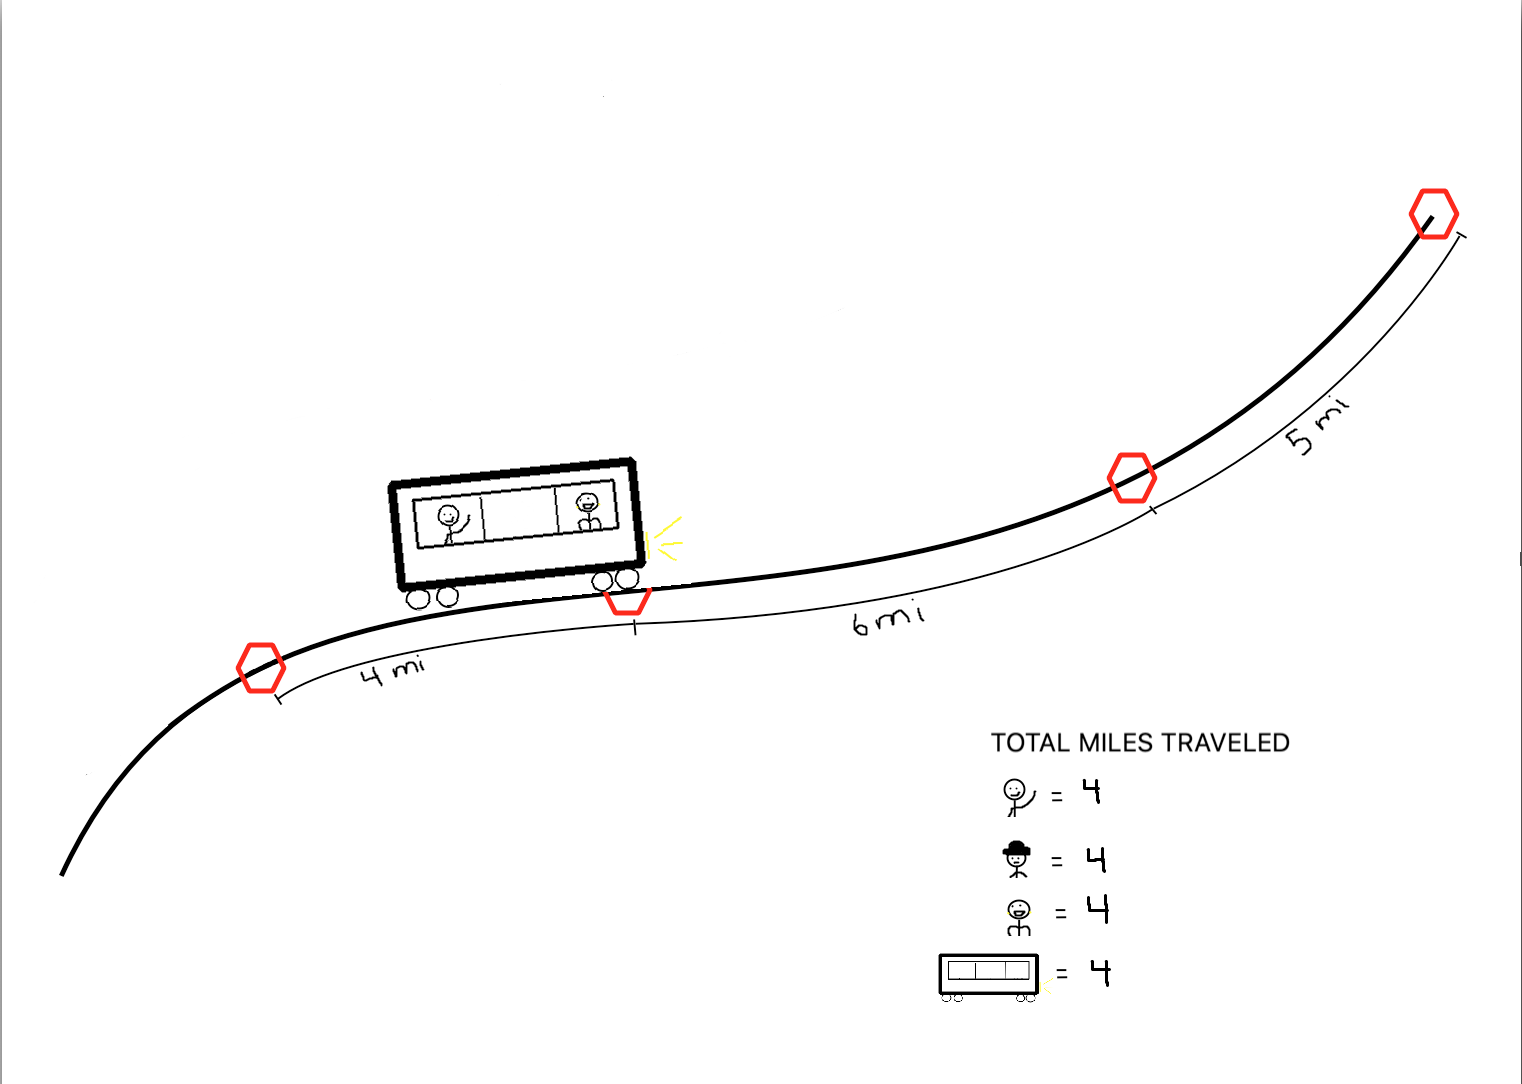

In [3]:
Image(filename = '/Users/gavincleach/Desktop/BART-painted-tracks/track_1.png', width = 700, height = 500)

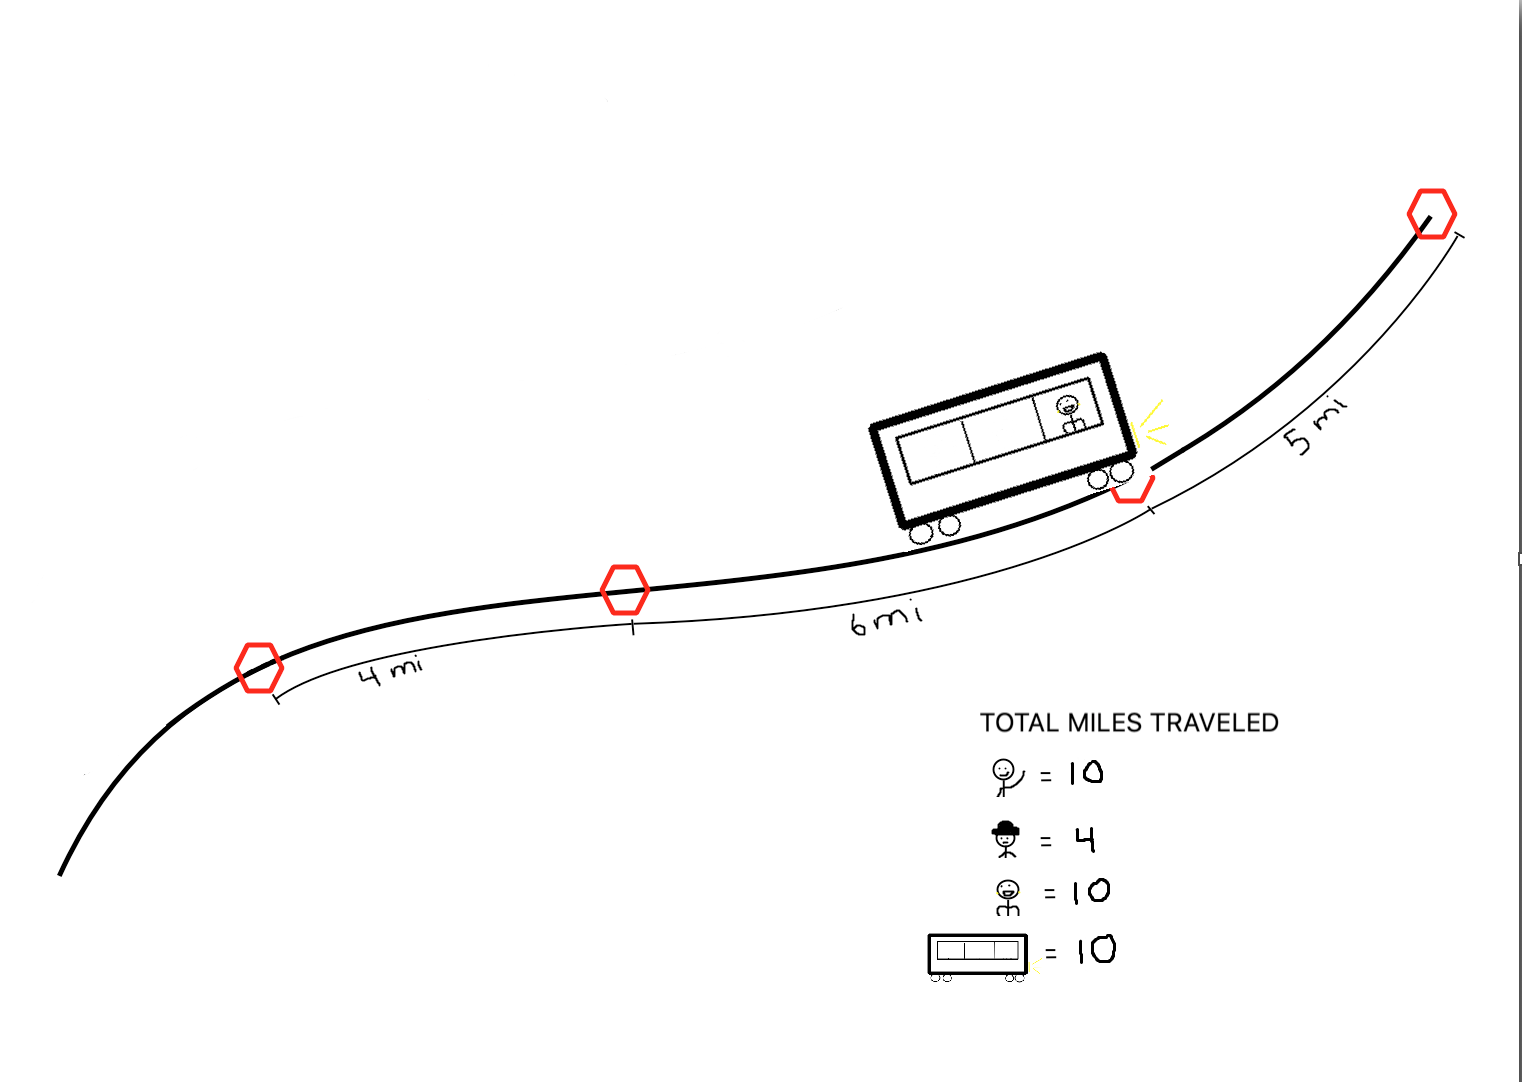

In [4]:
Image(filename = '/Users/gavincleach/Desktop/BART-painted-tracks/track_2.png', width = 700, height = 500)

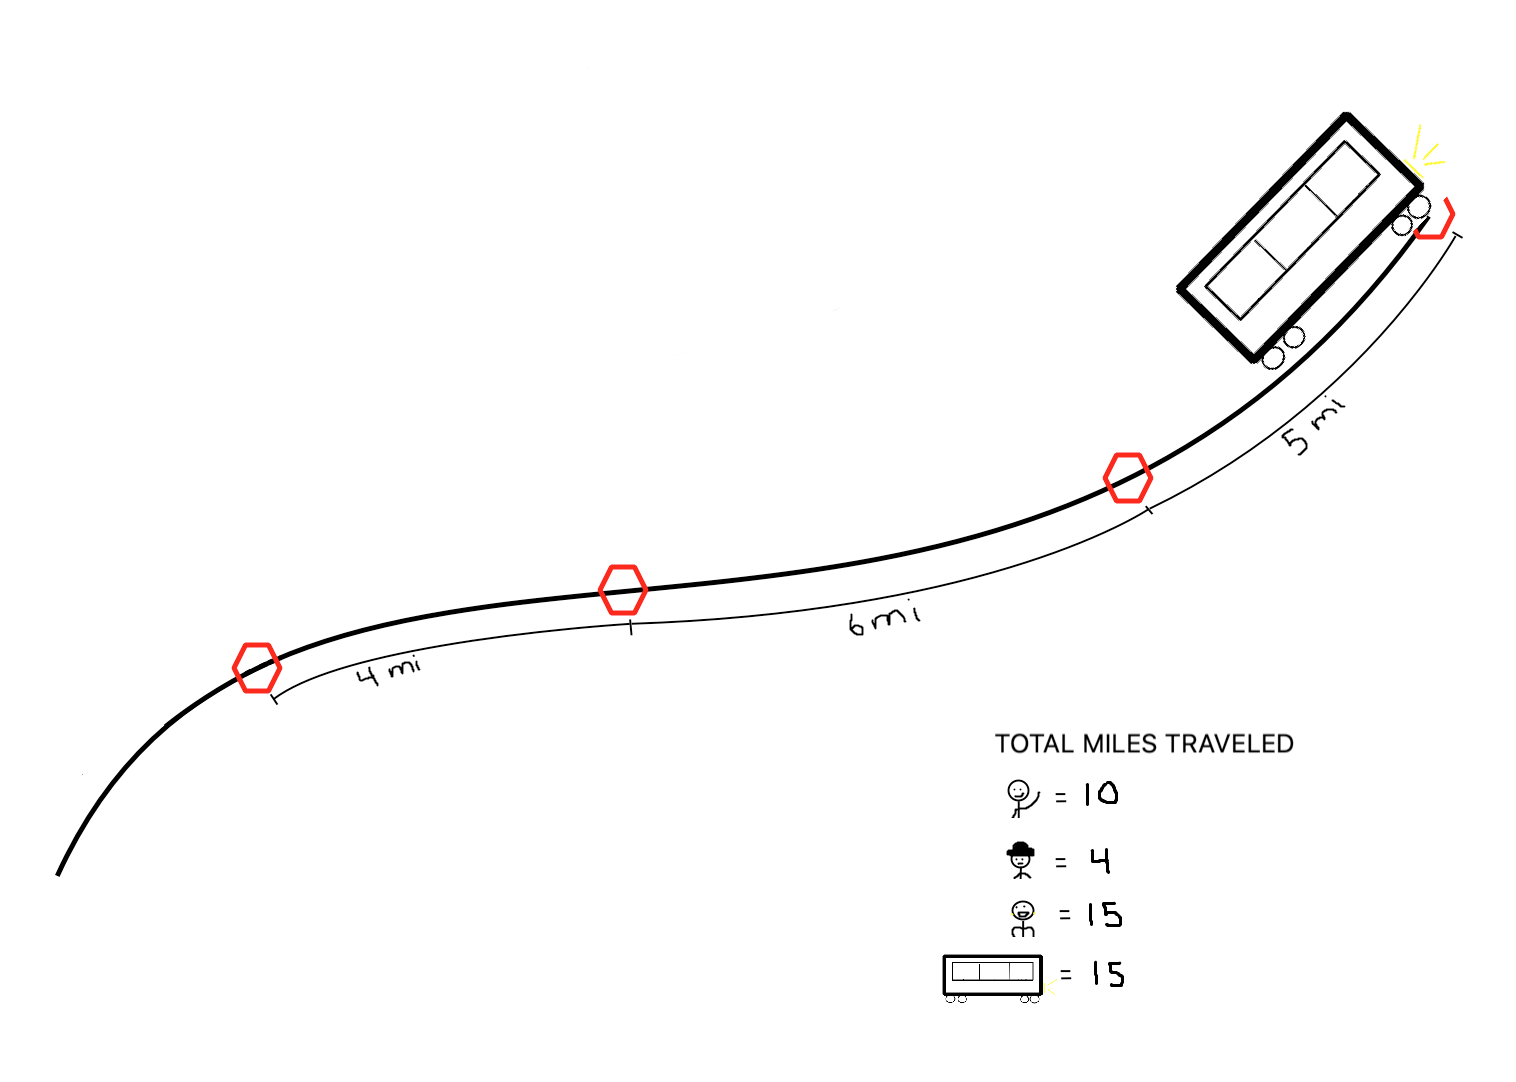

In [5]:
Image(filename = '/Users/gavincleach/Desktop/BART-painted-tracks/track_3.png', width = 700, height = 500)

## Ridership MPG

This metric will calculate how many miles individual riders go for every gallon of gas (or energy equivalent) used by the train. 

In our simplified example above we see that the total ridership miles for these 3 stops is: 29 MILES

    - What this means is that collectively, the three people riding the train went a total of 29 miles.

The total miles traveled by the train is: 15 MILES

Now, let's say for simplicity that this train gets 100 mpg.

We can then calculate the ridership miles per gallon through dividing the total miles traveled by the riders by the total amount of gallons of gas (energy equivalent to whatever fuel source the train uses) used. 

The gallons of gas used by our example train during this trip is: (15 miles) / (100 miles/gallon) = .15 gallons

So our Ridership MPG is: (29 total miles traveled by passengers) / (.15 gallons of gas) = 193.33 ridership miles per gallon.

When comparing ridership fuel efficiency the larger the number, the more efficient. 

Here, we want to find how many total miles the bart travelled in 2017, 2018, 2019, and also how many total miles riders travelled during this time. From this, we can find how many people per mile on average, the BART transports. We can also easily access the miles per gallon the bart gets (as an energy equivalent to gasoline), so in turn, we can find how many people the bart can transport 1 mile, and how much energy that consumes. 

After this is discovered, we can examine how fuel efficient (or inefficient) other commuting methods are, and hopefully shine some light on the beauty of the fuel efficiency of public transportation.

In [6]:
import pandas as pd

total_data = pd.read_csv('/Users/gavincleach/Desktop/pythonnn/customer-ridership-BART.csv')
total_data.head()

data = total_data.loc[(total_data['FiscalYear'] == 2017) | (total_data['FiscalYear'] == 2018) | (total_data['FiscalYear'] == 2019)]


We want to focus on 2017, 2018, 2019. So we are reading in the data for these years specifically.

In [7]:
columns = ['Day', 'Hour', 'Origin', 'Destination', 'Trip Count']
entry_exit_2017 = pd.read_csv('/Users/gavincleach/Desktop/pythonnn/date-hour-soo-dest-2017.csv', names = columns)
entry_exit_2018 = pd.read_csv('/Users/gavincleach/Desktop/pythonnn/date-hour-soo-dest-2018.csv', names = columns)
entry_exit_2019 = pd.read_csv('/Users/gavincleach/Desktop/pythonnn/date-hour-soo-dest-2019.csv', names = columns)


In [8]:
entry_exit = pd.concat([entry_exit_2017, entry_exit_2018, entry_exit_2019], sort = False)
bart_data = entry_exit.iloc[:, 0: 5]
bart_data.head()
bart_data.loc[(bart_data['Origin'] == 'RICH') & (bart_data['Destination'] == 'DUBL')]

,Day,Hour,Origin,Destination,Trip Count
4228,2017-01-01,9,RICH,DUBL,2
14179,2017-01-01,17,RICH,DUBL,1
16618,2017-01-01,19,RICH,DUBL,1
18685,2017-01-01,21,RICH,DUBL,1
23370,2017-01-02,7,RICH,DUBL,1
...,...,...,...,...,...
10104690,2019-12-31,16,RICH,DUBL,1
10106384,2019-12-31,17,RICH,DUBL,1
10108014,2019-12-31,18,RICH,DUBL,1
10109511,2019-12-31,19,RICH,DUBL,1


From this outcome, we know now that each trip can have transfers, because by referencing our BART map, we know that travelling from `RICH` to `DUBL` requires a transfer. 

Also, important note about the `Trip Count` column: This column shows how many specific trips (from `Origin` to `Destination`) people made suring the given hour. A `Trip Count` of 0 was excluded from this data set because it would show trips that never happened during that time, and would just take up space for our purposes.

What we want to do is for every possible trip between stations, we want to calculate the shortest possible distance of the trip. 

We want to make use of the information that Google has on it's directions API. We can use google to find the distance of each specific train track if we can input the exact addresses of each station. As long as we request this during a time when the bart is running, when we ask for the `transit` directions, we should get the BART trip and not another maybe, bus trip.

I am not showing my API key, however this information can be obtained through visiting 'https://maps.googleapis.com/maps/api'

In order to correctly find each trip distance, we need to make sure that we are finding the shortest trip distance, and we can do this by splitting our trips up into subtrips to track the good progress of our 'shortest trip' between two stations. We will be splitting up the trips in the next cell.

In [9]:
import urllib.request
import json
endpoint = 'https://maps.googleapis.com/maps/api/directions/json?'
#location_endpoint = 'https://maps.googleapis.com/maps/api/geocode/json?'
api_key = 'secret'




address_stations = ['200+North+Rollins+Road,+Millbrae,+CA+94030', 'International+Terminal,+Level+3,+San+Francisco+Int\'l+Airport,+CA+94128', '1151+Huntington+Avenue,+San+Bruno,+CA+94066', '1333+Mission+Road,+South+San+Francisco,+CA+94080', '365+D+Street,+Colma,+CA+94014', '500+John+Daly+Blvd.,+Daly+City,+CA+94014', '401+Geneva+Avenue,+San+Francisco,+CA+94112', '2901+Diamond+Street,+San+Francisco,+CA+94131', '2800+Mission+Street,+San+Francisco,+CA+94110', '2000+Mission+Street,+San+Francisco,+CA+94110', '1150+Market+Street,+San+Francisco,+CA+94102', '899+Market+Street,+San+Francisco,+CA+94102', '598+Market+Street,+San+Francisco,+CA+94104', '298+Market+Street,+San+Francisco,+CA+94111', '1451+7th+Street,+Oakland,+CA+94607', '800+Madison+Street,+Oakland,+CA+94607', '3401+East+12th+Street,+Oakland,+CA+94601', '7200+San+Leandro+St.,+Oakland,+CA+94621', '4+Airport+Drive,+Oakland,+CA+94621', '1401+San+Leandro+Blvd.,+San+Leandro,+CA+94577', '15242+Hesperian+Blvd.,+San+Leandro,+CA+94578', '3301+Norbridge+Dr.,+Castro+Valley,+CA+94546', '6501+Golden+Gate+Drive,+Dublin,+CA+94568', '5801+Owens+Dr.,+Pleasanton,+CA+94588', '699+\'B\'+Street,+Hayward,+CA+94541', '28601+Dixon+Street,+Hayward,+CA+94544', '10+Union+Square,+Union+City,+CA+94587', '2000+BART+Way,+Fremont,+CA+94536', '45193+Warm+Springs+Blvd,+Fremont,+CA+94539', '1245+Broadway,+Oakland,+CA+94612', '1900+Broadway,+Oakland,+CA+94612', '555+40th+Street,+Oakland,+CA+94609', '3100+Adeline+Street,+Berkeley,+CA+94703', '2160+Shattuck+Avenue,+Berkeley,+CA+94704', '1750+Sacramento+Street,+Berkeley,+CA+94702', '6699+Fairmount+Avenue,+El+Cerrito,+CA+94530', '6400+Cutting+Blvd.,+El+Cerrito,+CA+94530', '1700+Nevin+Avenue,+Richmond,+CA+94801', '5660+College+Avenue,+Oakland,+CA+94618', '11+Camino+Pablo,+Orinda,+CA+94563', '3601+Deer+Hill+Road,+Lafayette,+CA+94549', '200+Ygnacio+Valley+Road,+Walnut+Creek,+CA+94596', '1365+Treat+Blvd.,+Walnut+Creek,+CA+94597', '1451+Oakland+Avenue,+Concord,+CA+94520', '3700+Port+Chicago+Highway,+Concord,+CA+94520', '1700+West+Leland+Road,+Pittsburg,+CA+94565', '2099+Railroad+Avenue,+Pittsburg,+CA+94565', '1600+Slatten+Ranch+Road,+Antioch,+CA+94509']
stations = ['Millbrae', 'SFO', 'San Bruno', 'South San Francisco', 'Colma', 'Daly City', 'Balboa Park', 'Glen Park', '24th St Mission', '16th St Mission', 'Civic Center/UN Plaza', 'Powell St', 'Montgomery St', 'Embarcadero', 'West Oakland', 'Lake Merritt', 'Fruitvale', 'Coliseum', 'Oakland Airport', 'San Leandro', 'Bay Fair', 'Castro Valley', 'West Dublin/Pleasanton', 'Dublin/Pleasanton', 'Hayward', 'South Hayward', 'Union City', 'Fremont', 'Warm Springs/South Fremont', '12th St/Oakland City Center', '19th St Oakland', 'MacArthur', 'Ashby', 'Downtown Berkeley', 'North Berkeley', 'El Cerrito Plaza', 'El Cerrito del Norte', 'Richmond', 'Rockridge', 'Orinda', 'Lafayette', 'Walnut Creek', 'Pleasant Hill/Contra Costa Centre', 'Concord', 'North Concord/Martinez', 'Pittsburgh/Bay Point', 'Pittsburgh Center', 'Antioch']

station_address = {}

i = 0
for station in stations:
    station_address[station] = address_stations[i]
    i += 1
    
#FOR THE SAKE OF SIMPLIFYING CODE, WE WILL ASSUME THAT Red Yellow Blue AND Green LINES ALL GO TO SFO AND TO MILLBRAE.
#THIS IS BECAUSE THESE TRANSFERS WOULD NOT CHANGE THE DISTANCE EACH TRAIN TRAVELS WHILE SOMEONE IS RIDING

red_stations = ['Millbrae', 'SFO', 'San Bruno', 'South San Francisco', 'Colma', 'Daly City', 'Balboa Park', 'Glen Park', '24th St Mission', '16th St Mission', 'Civic Center/UN Plaza', 'Powell St', 'Montgomery St', 'Embarcadero', 'West Oakland', '12th St/Oakland City Center', '19th St Oakland', 'MacArthur', 'Ashby', 'Downtown Berkeley', 'North Berkeley', 'El Cerrito Plaza', 'El Cerrito del Norte', 'Richmond']
yellow_stations = ['Millbrae', 'SFO', 'San Bruno', 'South San Francisco', 'Colma', 'Daly City', 'Balboa Park', 'Glen Park', '24th St Mission', '16th St Mission', 'Civic Center/UN Plaza', 'Powell St', 'Montgomery St', 'Embarcadero', 'West Oakland', '12th St/Oakland City Center', '19th St Oakland', 'MacArthur', 'Rockridge', 'Orinda', 'Lafayette', 'Walnut Creek', 'Pleasant Hill/Contra Costa Centre', 'Concord', 'North Concord/Martinez', 'Pittsburgh/Bay Point', 'Pittsburgh Center', 'Antioch']
#purple_stations = ['Millbrae', 'SFO']
#purple_stations is redundant
blue_stations = ['Daly City', 'Balboa Park', 'Glen Park', '24th St Mission', '16th St Mission', 'Civic Center/UN Plaza', 'Powell St', 'Montgomery St', 'Embarcadero', 'West Oakland', 'Lake Merritt', 'Fruitvale', 'Coliseum', 'San Leandro', 'Bay Fair', 'Castro Valley', 'West Dublin/Pleasanton', 'Dublin/Pleasanton']
green_stations = ['Daly City', 'Balboa Park', 'Glen Park', '24th St Mission', '16th St Mission', 'Civic Center/UN Plaza', 'Powell St', 'Montgomery St', 'Embarcadero', 'West Oakland', 'Lake Merritt', 'Fruitvale', 'Coliseum', 'San Leandro', 'Bay Fair', 'Hayward', 'South Hayward', 'Union City', 'Fremont', 'Warm Springs/South Fremont']
grey_stations = ['Coliseum', 'Oakland Airport']
orange_stations = ['Lake Merritt', 'Fruitvale', 'Coliseum', 'San Leandro', 'Bay Fair', 'Hayward', 'South Hayward', 'Union City', 'Fremont', 'Warm Springs/South Fremont', '12th St/Oakland City Center', '19th St Oakland', 'MacArthur', 'Ashby', 'Downtown Berkeley', 'North Berkeley', 'El Cerrito Plaza', 'El Cerrito del Norte', 'Richmond']

transfer_stations = ['MacArthur', 'Coliseum']

trips = []
index = 0

for origin_station in stations:
    destination_stations = stations[: index] + stations [(index + 1):]
    for destination_station in destination_stations:
        trip = (origin_station, destination_station)
        trips.append(trip)
    index += 1
    

lines = [red_stations, yellow_stations, blue_stations, green_stations, grey_stations, orange_stations]

def check_transfer(trip):
    for line in lines:
        if (trip[0] in line) & (trip[1] in line):
            return False
        else:
            continue
    return True



stations_through_macarthur = list(set(red_stations + orange_stations + yellow_stations))
stations_through_coliseum = list(set(grey_stations + green_stations + orange_stations + blue_stations))
n_east_bay = ['12th St/Oakland City Center', '19th St Oakland', 'MacArthur', 'Rockridge', 'Orinda', 'Lafayette', 'Walnut Creek', 'Pleasant Hill/Contra Costa Centre', 'Concord', 'North Concord/Martinez', 'Pittsburgh/Bay Point', 'Pittsburgh Center', 'Antioch', 'Ashby', 'Downtown Berkeley', 'North Berkeley', 'El Cerrito Plaza', 'El Cerrito del Norte', 'Richmond']
s_east_bay = ['Lake Merritt', 'Fruitvale', 'Coliseum', 'San Leandro', 'Bay Fair', 'Castro Valley', 'West Dublin/Pleasanton', 'Dublin/Pleasanton', 'Oakland Airport', 'Hayward', 'South Hayward', 'Union City', 'Fremont', 'Warm Springs/South Fremont']
s_daly = ['Millbrae', 'SFO', 'San Bruno', 'South San Francisco', 'Colma']
bay_fair_and_south = ['Bay Fair', 'Castro Valley', 'West Dublin/Pleasanton', 'Dublin/Pleasanton', 'Hayward', 'South Hayward', 'Union City', 'Fremont', 'Warm Springs/South Fremont']
end_of_blue = ['Castro Valley', 'West Dublin/Pleasanton', 'Dublin/Pleasanton']
twelfth_nineteenth = ['12th St/Oakland City Center', '19th St Oakland']
lake_fruit = ['Lake Merritt', 'Fruitvale']
# To make easier, stop all trains at daly city going south to break up the trip and make easier to add
   
    
def directions(trip):
    result_transfers = []
    origin = trip[0]
    dest = trip[1]
    if ((origin == 'SFO') & (dest == 'Millbrae')):
        result_transfers.append(('SFO', 'Millbrae'))
        return result_transfers
    elif origin == 'SFO':
        result_transfers.append(('SFO', 'San Bruno'))
        origin = 'San Bruno'
    if ((origin in s_daly) & (trip[1] in s_daly)):
        result_transfers.append(trip)
        return result_transfers
    elif origin in s_daly:
        result_transfers.append((origin, 'Daly City'))
        origin = 'Daly City'
    elif trip[1] in s_daly:
        result_transfers.append((origin, 'Daly City'))
        origin = 'Daly City'
    if check_transfer((origin, dest)) == False:
        result_transfers.append((origin, dest))
        return result_transfers
    if ((origin in bay_fair_and_south) & (dest in bay_fair_and_south)) & ((origin in end_of_blue) ^ (dest in end_of_blue)):
        result_transfers.append((origin, 'Bay Fair'))
        result_transfers.append(('Bay Fair', dest))
        return result_transfers
    if (((origin in twelfth_nineteenth) & (dest in s_east_bay)) | ((dest in twelfth_nineteenth) & (origin in s_east_bay))):
        if (((origin in twelfth_nineteenth) & (dest in lake_fruit)) | ((dest in twelfth_nineteenth) & (origin in lake_fruit))):
            result_transfers.append(origin, dest)
            return result_transfers
        result_transfers.append((origin, 'Coliseum')) 
        result_transfers.append(('Coliseum', dest)) 
        return result_transfers
    if (((origin in lake_fruit) & (dest in n_east_bay)) | ((dest in lake_fruit) & (origin in n_east_bay))):
        if (((origin in twelfth_nineteenth) & (dest in lake_fruit)) | ((dest in twelfth_nineteenth) & (origin in lake_fruit))):
            result_transfers.append(origin, dest)
            return result_transfers
        result_transfers.append((origin, 'MacArthur')) 
        result_transfers.append(('MacArthur', dest)) 
        return result_transfers
    if ((origin in stations_through_macarthur) & ((origin in n_east_bay) | (dest in n_east_bay))):
        result_transfers.append((origin, 'MacArthur'))
        result_transfers.append(('MacArthur', dest))
    elif ((origin in stations_through_coliseum) & ((origin in s_east_bay) | (dest in s_east_bay))):
        result_transfers.append((origin, 'Coliseum'))
        result_transfers.append(('Coliseum', dest))
    return result_transfers

print(directions(('Oakland Airport', 'Richmond')))
print(directions(('Dublin/Pleasanton', 'Daly City')))
print(directions(('SFO', 'Fremont')))   
print(directions(('SFO', 'Oakland Airport')))
print(directions(('Millbrae', 'Union City')))
print(directions(('Daly City', 'Coliseum')))
print(directions(('Daly City', 'Oakland Airport')))
print(directions(('SFO', 'Glen Park')))
print(directions(('Fremont', 'Oakland Airport')))
print('\n')
print(directions(('Fremont', 'Castro Valley')))
print('\n')
print(station_address)

[('Oakland Airport', 'Coliseum'), ('Coliseum', 'Richmond')]
[('Dublin/Pleasanton', 'Daly City')]
[('SFO', 'San Bruno'), ('San Bruno', 'Daly City'), ('Daly City', 'Fremont')]
[('SFO', 'San Bruno'), ('San Bruno', 'Daly City'), ('Daly City', 'Coliseum'), ('Coliseum', 'Oakland Airport')]
[('Millbrae', 'Daly City'), ('Daly City', 'Union City')]
[('Daly City', 'Coliseum')]
[('Daly City', 'Coliseum'), ('Coliseum', 'Oakland Airport')]
[('SFO', 'San Bruno'), ('San Bruno', 'Daly City'), ('Daly City', 'Glen Park')]
[('Fremont', 'Coliseum'), ('Coliseum', 'Oakland Airport')]


[('Fremont', 'Bay Fair'), ('Bay Fair', 'Castro Valley')]


{'Millbrae': '200+North+Rollins+Road,+Millbrae,+CA+94030', 'SFO': "International+Terminal,+Level+3,+San+Francisco+Int'l+Airport,+CA+94128", 'San Bruno': '1151+Huntington+Avenue,+San+Bruno,+CA+94066', 'South San Francisco': '1333+Mission+Road,+South+San+Francisco,+CA+94080', 'Colma': '365+D+Street,+Colma,+CA+94014', 'Daly City': '500+John+Daly+Blvd.,+Daly+City,+CA+9401

In the next cell `presented_trips` is a list of each possible trip, separated into smaller chunks that will correctly assemble each trip. `unique_subtrips` is a list of all of the unique steps possible, found in `presented_trips`.

Also, in the next cell, we access the Google Directions API to find the distance of each unique subtrip. We have stored each of these distances along with the corresponding subtrip in `short_distance_trips_dict`.

In [10]:
presented_trips = []
for trip in trips:
    presented_trips.append(directions(trip))

unique_subtrips = []
for trip_steps in presented_trips:
    for step in trip_steps:
        if ((step not in unique_subtrips) & (step[0] != step[1])):
            unique_subtrips.append(step)


unique_subtrips_address = []
for subtrip in unique_subtrips:
    address_subtrip = (station_address[subtrip[0]], station_address[subtrip[1]])
    unique_subtrips_address.append(address_subtrip)
            

print(len(unique_subtrips) == len(set(unique_subtrips)))


half_of_short_distance_trips = [('Millbrae', 'San Bruno'), ('Millbrae', 'SFO'), ('SFO', 'San Bruno'), ('San Bruno', 'South San Francisco'), ('South San Francisco', 'Colma'), ('Colma', 'Daly City'), ('Daly City', 'Balboa Park'), ('Balboa Park', 'Glen Park'), ('Glen Park', '24th St Mission'), ('24th St Mission', '16th St Mission'), ('16th St Mission', 'Civic Center/UN Plaza'), ('Civic Center/UN Plaza', 'Powell St'), ('Powell St', 'Montgomery St'), ('Montgomery St', 'Embarcadero'), ('Embarcadero', 'West Oakland'), ('West Oakland', '12th St/Oakland City Center'), ('12th St/Oakland City Center', '19th St Oakland'), ('19th St Oakland', 'MacArthur'), ('MacArthur', 'Ashby'), ('Ashby', 'Downtown Berkeley'), ('Downtown Berkeley', 'North Berkeley'), ('North Berkeley', 'El Cerrito Plaza'), ('El Cerrito Plaza', 'El Cerrito del Norte'), ('El Cerrito del Norte', 'Richmond'), ('MacArthur', 'Rockridge'), ('Rockridge', 'Orinda'), ('Orinda', 'Lafayette'), ('Lafayette', 'Walnut Creek'), ('Walnut Creek', 'Pleasant Hill/Contra Costa Centre'), ('Pleasant Hill/Contra Costa Centre', 'Concord'), ('Concord', 'North Concord/Martinez'), ('North Concord/Martinez', 'Pittsburgh/Bay Point'), ('Pittsburgh/Bay Point', 'Pittsburgh Center'), ('Pittsburgh Center', 'Antioch'), ('West Oakland', 'Lake Merritt'), ('Lake Merritt', 'Fruitvale'), ('Fruitvale', 'Coliseum'), ('Coliseum', 'Oakland Airport'), ('Coliseum', 'San Leandro'), ('San Leandro', 'Bay Fair'), ('Bay Fair', 'Castro Valley'), ('Castro Valley', 'West Dublin/Pleasanton'), ('West Dublin/Pleasanton', 'Dublin/Pleasanton'), ('Bay Fair', 'Hayward'), ('Hayward', 'South Hayward'), ('South Hayward', 'Union City'), ('Union City', 'Fremont'), ('Fremont', 'Warm Springs/South Fremont'), ('12th St/Oakland City Center', 'Lake Merritt')]
short_distance_trips = half_of_short_distance_trips.copy()
for trip in half_of_short_distance_trips:
    short_distance_trips.append((trip[1], trip[0]))

print(len(short_distance_trips))
    
short_distance_trips_dict = dict.fromkeys(short_distance_trips, 0)


#for trip in short_distance_trips_dict.keys(): 
#    origin = station_address[trip[0]]
#    destination = station_address[trip[1]]
#    nav_request = 'origin={}&destination={}&mode=transit&key={}'.format(origin, destination, api_key)
#    request = endpoint + nav_request
#    response = urllib.request.urlopen(request).read()
#    directs = json.loads(response)
#    directs.keys()
#    routes = directs['routes']
#    zeroeth_step_info = routes[0]['legs'][0]['steps'][0]
#    if zeroeth_step_info['travel_mode'] == 'WALKING':
#        zeroeth_step_info = routes[0]['legs'][0]['steps'][1]
#    result = zeroeth_step_info['distance']['text']
#    print(result)
#    short_distance_trips_dict[trip] = result


short_distance_trips_dict = {('Millbrae', 'San Bruno'): '3.1 mi', ('Millbrae', 'SFO'): '2.6 mi', ('SFO', 'San Bruno'): '2.2 mi', ('San Bruno', 'SFO'): '2.2 mi', ('San Bruno', 'South San Francisco'): '2.4 mi', ('South San Francisco', 'Colma'): '1.9 mi', ('Colma', 'Daly City'): '1.6 mi', ('Daly City', 'Balboa Park'): '1.8 mi', ('Balboa Park', 'Glen Park'): '1.1 mi', ('Glen Park', '24th St Mission'): '1.7 mi', ('24th St Mission', '16th St Mission'): '0.9 mi', ('16th St Mission', 'Civic Center/UN Plaza'): '1.1 mi', ('Civic Center/UN Plaza', 'Powell St'): '0.5 mi', ('Powell St', 'Montgomery St'): '0.4 mi', ('Montgomery St', 'Embarcadero'): '0.3 mi', ('Embarcadero', 'West Oakland'): '5.8 mi', ('West Oakland', '12th St/Oakland City Center'): '1.6 mi', ('12th St/Oakland City Center', '19th St Oakland'): '0.4 mi', ('12th St/Oakland City Center', 'Lake Merritt'): '0.7 mi', ('Lake Merritt', '12th St/Oakland City Center'): '0.7 mi', ('19th St Oakland', 'MacArthur'): '1.5 mi', ('MacArthur', 'Ashby'): '1.7 mi', ('Ashby', 'Downtown Berkeley'): '1.2 mi', ('Downtown Berkeley', 'North Berkeley'): '1.0 mi', ('North Berkeley', 'El Cerrito Plaza'): '2.2 mi', ('El Cerrito Plaza', 'El Cerrito del Norte'): '1.8 mi', ('El Cerrito del Norte', 'Richmond'): '2.3 mi', ('MacArthur', 'Rockridge'): '1.5 mi', ('Rockridge', 'Orinda'): '4.4 mi', ('Orinda', 'Lafayette'): '3.8 mi', ('Lafayette', 'Walnut Creek'): '3.4 mi', ('Walnut Creek', 'Pleasant Hill/Contra Costa Centre'): '1.7 mi', ('Pleasant Hill/Contra Costa Centre', 'Concord'): '4.1 mi', ('Concord', 'North Concord/Martinez'): '2.2 mi', ('North Concord/Martinez', 'Pittsburgh/Bay Point'): '4.8 mi', ('Pittsburgh/Bay Point', 'Pittsburgh Center'): '3.1 mi', ('Pittsburgh Center', 'Antioch'): '6.2 mi', ('West Oakland', 'Lake Merritt'): '1.8 mi', ('Lake Merritt', 'Fruitvale'): '2.7 mi', ('Fruitvale', 'Coliseum'): '2.1 mi', ('Coliseum', 'Oakland Airport'): '3.2 mi', ('Coliseum', 'San Leandro'): '3.0 mi', ('San Leandro', 'Bay Fair'): '2.6 mi', ('Bay Fair', 'Castro Valley'): '3.0 mi', ('Castro Valley', 'West Dublin/Pleasanton'): '8.4 mi', ('West Dublin/Pleasanton', 'Dublin/Pleasanton'): '1.6 mi', ('Bay Fair', 'Hayward'): '2.9 mi', ('Hayward', 'South Hayward'): '3.0 mi', ('South Hayward', 'Union City'): '3.8 mi', ('Union City', 'Fremont'): '3.2 mi', ('Fremont', 'Warm Springs/South Fremont'): '4.7 mi', ('San Bruno', 'Millbrae'): '3.1 mi', ('SFO', 'Millbrae'): '3.0 mi', ('South San Francisco', 'San Bruno'): '2.4 mi', ('Colma', 'South San Francisco'): '1.9 mi', ('Daly City', 'Colma'): '1.6 mi', ('Balboa Park', 'Daly City'): '1.8 mi', ('Glen Park', 'Balboa Park'): '1.1 mi', ('24th St Mission', 'Glen Park'): '1.7 mi', ('16th St Mission', '24th St Mission'): '0.9 mi', ('Civic Center/UN Plaza', '16th St Mission'): '1.1 mi', ('Powell St', 'Civic Center/UN Plaza'): '0.5 mi', ('Montgomery St', 'Powell St'): '0.4 mi', ('Embarcadero', 'Montgomery St'): '0.3 mi', ('West Oakland', 'Embarcadero'): '5.9 mi', ('12th St/Oakland City Center', 'West Oakland'): '1.6 mi', ('19th St Oakland', '12th St/Oakland City Center'): '0.4 mi', ('MacArthur', '19th St Oakland'): '1.5 mi', ('Ashby', 'MacArthur'): '1.7 mi', ('Downtown Berkeley', 'Ashby'): '1.2 mi', ('North Berkeley', 'Downtown Berkeley'): '1.0 mi', ('El Cerrito Plaza', 'North Berkeley'): '2.2 mi', ('El Cerrito del Norte', 'El Cerrito Plaza'): '1.8 mi', ('Richmond', 'El Cerrito del Norte'): '2.3 mi', ('Rockridge', 'MacArthur'): '1.5 mi', ('Orinda', 'Rockridge'): '4.4 mi', ('Lafayette', 'Orinda'): '3.8 mi', ('Walnut Creek', 'Lafayette'): '3.4 mi', ('Pleasant Hill/Contra Costa Centre', 'Walnut Creek'): '1.7 mi', ('Concord', 'Pleasant Hill/Contra Costa Centre'): '4.1 mi', ('North Concord/Martinez', 'Concord'): '2.2 mi', ('Pittsburgh/Bay Point', 'North Concord/Martinez'): '4.8 mi', ('Pittsburgh Center', 'Pittsburgh/Bay Point'): '3.1 mi', ('Antioch', 'Pittsburgh Center'): '6.2 mi', ('Lake Merritt', 'West Oakland'): '1.8 mi', ('Fruitvale', 'Lake Merritt'): '2.7 mi', ('Coliseum', 'Fruitvale'): '2.1 mi', ('Oakland Airport', 'Coliseum'): '3.2 mi', ('San Leandro', 'Coliseum'): '3.0 mi', ('Bay Fair', 'San Leandro'): '2.6 mi', ('Castro Valley', 'Bay Fair'): '3.0 mi', ('West Dublin/Pleasanton', 'Castro Valley'): '8.4 mi', ('Dublin/Pleasanton', 'West Dublin/Pleasanton'): '1.6 mi', ('Hayward', 'Bay Fair'): '2.9 mi', ('South Hayward', 'Hayward'): '3.0 mi', ('Union City', 'South Hayward'): '3.8 mi', ('Fremont', 'Union City'): '3.2 mi', ('Warm Springs/South Fremont', 'Fremont'): '4.7 mi'}

for key, value in short_distance_trips_dict.items():
    short_distance_trips_dict[key] = float(value.replace(' mi', ''))

print(short_distance_trips_dict)
    

#THE DISTANCE PARAMETER MEASURES THE ACTUAL DISTANCE OF THE PATH ITSELF!
#If its not getting right on the train, it will be walk to the train and then get on.
#So if 'travel_mode' is not 'TRANSIT', we should go to the next step.


#Now that we have run it, we will not run it again so we can stop using th API requests and save money!

True
98
{('Millbrae', 'San Bruno'): 3.1, ('Millbrae', 'SFO'): 2.6, ('SFO', 'San Bruno'): 2.2, ('San Bruno', 'SFO'): 2.2, ('San Bruno', 'South San Francisco'): 2.4, ('South San Francisco', 'Colma'): 1.9, ('Colma', 'Daly City'): 1.6, ('Daly City', 'Balboa Park'): 1.8, ('Balboa Park', 'Glen Park'): 1.1, ('Glen Park', '24th St Mission'): 1.7, ('24th St Mission', '16th St Mission'): 0.9, ('16th St Mission', 'Civic Center/UN Plaza'): 1.1, ('Civic Center/UN Plaza', 'Powell St'): 0.5, ('Powell St', 'Montgomery St'): 0.4, ('Montgomery St', 'Embarcadero'): 0.3, ('Embarcadero', 'West Oakland'): 5.8, ('West Oakland', '12th St/Oakland City Center'): 1.6, ('12th St/Oakland City Center', '19th St Oakland'): 0.4, ('12th St/Oakland City Center', 'Lake Merritt'): 0.7, ('Lake Merritt', '12th St/Oakland City Center'): 0.7, ('19th St Oakland', 'MacArthur'): 1.5, ('MacArthur', 'Ashby'): 1.7, ('Ashby', 'Downtown Berkeley'): 1.2, ('Downtown Berkeley', 'North Berkeley'): 1.0, ('North Berkeley', 'El Cerrito Pla

Above, we have all of the one-stop trips that a rider can make.

In [11]:
#with no duplicates, find each path
from collections import OrderedDict

def find_steps_subtrip(subtrip):
    paths = []
    
    def add_path(subtrip, path):
        origin = subtrip[0]
        dest = subtrip[1]
        if (path[-1] == dest):
            paths.append(path)
        for key in short_distance_trips_dict.keys():
            if ((origin == key[0]) & (key[1] not in path)):
                new_path = path.copy()
                new_path.append(key[1])
                add_path((key[1], dest), new_path)
            else:
                continue
            
    def pick_shortest(paths):
        shortest = paths[0]
        for path in paths:
            if len(path) < len(shortest):
                shortest = path
        return shortest
    
    add_path(subtrip, [subtrip[0]])
    return pick_shortest(paths)


def find_steps(trip):
    subtrips = directions(trip)
    whole_trip = []
    for subtrip in subtrips:
        whole_trip += find_steps_subtrip(subtrip)
    return list(OrderedDict.fromkeys(whole_trip))
        
    
    
find_steps(('North Concord/Martinez', 'Oakland Airport'))

['North Concord/Martinez',
 'Concord',
 'Pleasant Hill/Contra Costa Centre',
 'Walnut Creek',
 'Lafayette',
 'Orinda',
 'Rockridge',
 'MacArthur',
 '19th St Oakland',
 '12th St/Oakland City Center',
 'Lake Merritt',
 'Fruitvale',
 'Coliseum',
 'Oakland Airport']

So now we have the capability to input any trip and find the step-by-step directions for the shortest route there.

Next we want to be able to find the distance of that trip in miles.

In [12]:
def find_keys(trip):
    steps = find_steps(trip)
    keys = []
    for i in range(0, len(steps)):
        if i == (len(steps) - 1):
            break
        key = (steps[i], steps[i + 1])
        keys.append(key)
    return keys

print(find_keys(('North Concord/Martinez', 'Oakland Airport')))

def find_distance(trip):
    keys = find_keys(trip)
    dist = 0
    for key in keys:
        dist += short_distance_trips_dict[key]
    return dist

find_distance(('North Concord/Martinez', 'Oakland Airport'))

[('North Concord/Martinez', 'Concord'), ('Concord', 'Pleasant Hill/Contra Costa Centre'), ('Pleasant Hill/Contra Costa Centre', 'Walnut Creek'), ('Walnut Creek', 'Lafayette'), ('Lafayette', 'Orinda'), ('Orinda', 'Rockridge'), ('Rockridge', 'MacArthur'), ('MacArthur', '19th St Oakland'), ('19th St Oakland', '12th St/Oakland City Center'), ('12th St/Oakland City Center', 'Lake Merritt'), ('Lake Merritt', 'Fruitvale'), ('Fruitvale', 'Coliseum'), ('Coliseum', 'Oakland Airport')]


31.7

Now we have a way to turn any trip into the distance by bart (shortest possible trip) in miles.
So we want to use this functionality on our dataset.

In [13]:
name_translation_map = {'POWL': 'Powell St', 'EMBR': 'Embarcadero', 'CIVC': 'Civic Center/UN Plaza', 'MONT': 'Montgomery St', '16TH': '16th St Mission', '12TH': '12th St/Oakland City Center', '24TH': '24th St Mission', 'DBRK': 'Downtown Berkeley', '19TH': '19th St Oakland', 'SFIA': 'SFO', 'MCAR': 'MacArthur', 'FTVL': 'Fruitvale', 'DALY': 'Daly City', 'COLS': 'Coliseum', 'BALB': 'Balboa Park', 'LAKE': 'Lake Merritt', 'DELN': 'El Cerrito del Norte', 'GLEN': 'Glen Park', 'SANL': 'San Leandro', 'CONC': 'Concord', 'BAYF': 'Bay Fair', 'WCRK': 'Walnut Creek', 'ASHB': 'Ashby', 'HAYW': 'Hayward', 'FRMT': 'Fremont', 'WOAK': 'West Oakland', 'DUBL': 'Dublin/Pleasanton', 'RICH': 'Richmond', 'ROCK': 'Rockridge', 'PITT': 'Pittsburgh/Bay Point', 'PHIL': 'Pleasant Hill/Contra Costa Centre', 'NBRK': 'North Berkeley', 'PLZA': 'El Cerrito Plaza', 'MLBR': 'Millbrae', 'UCTY': 'Union City', 'SBRN': 'San Bruno', 'SHAY': 'South Hayward', 'OAKL': 'Oakland Airport', 'WARM': 'Warm Springs/South Fremont', 'COLM': 'Colma', 'WDUB': 'West Dublin/Pleasanton', 'SSAN': 'South San Francisco', 'LAFY': 'Lafayette', 'CAST': 'Castro Valley', 'ORIN': 'Orinda', 'NCON': 'North Concord/Martinez', 'ANTC': 'Antioch', 'PCTR': 'Pittsburgh Center'}



MLPT (Milipitas) and BERY stations (Berryessa) are not fully functioning, so we will neglect those data points.

In [14]:
bart_data = bart_data.loc[bart_data['Origin'] != 'MLPT']
bart_data = bart_data.loc[bart_data['Origin'] != 'BERY']
bart_data = bart_data.loc[bart_data['Destination'] != 'MLPT']
bart_data = bart_data.loc[bart_data['Destination'] != 'BERY']

In [15]:
bart_data['Origin'] = bart_data['Origin'].map(name_translation_map)
bart_data['Destination'] = bart_data['Destination'].map(name_translation_map)
bart_data.head()

,Day,Hour,Origin,Destination,Trip Count
0,2017-01-01,0,12th St/Oakland City Center,19th St Oakland,1
1,2017-01-01,0,12th St/Oakland City Center,24th St Mission,2
2,2017-01-01,0,12th St/Oakland City Center,Bay Fair,1
3,2017-01-01,0,12th St/Oakland City Center,Civic Center/UN Plaza,5
4,2017-01-01,0,12th St/Oakland City Center,Coliseum,2


We want to make a new column which contains the `trip` tuple we have been using.

There are a large amount of data points though, so we want to be mindful of computation time. We want to see how many possible trips there are...

In [16]:
choices = len(stations)
print(choices)


48


To find the number of total possible trips (enforcing that (origin,dest) == (dest,origin) to save on run-time) We use the number of stations, and use a permutation calculation to find '48 Permutes 2'

In [17]:
import math

def p_n_r(n, r):
    return math.factorial(n) / math.factorial(n - r)

p_n_r(48, 2)

2256.0

So there are 2256 combinations, so we want to find each distance for those.

In [18]:
every_trip = []
for station1 in stations:
    for station2 in stations:
        if station1 != station2:
            every_trip.append((station1, station2))

print(len(every_trip))

2256


Now the list `every-trip` has all of the tuples (origin, destination) of each trip.

In [19]:
print(find_keys(('12th St/Oakland City Center', 'Oakland Airport')))
print(directions(('12th St/Oakland City Center', 'Oakland Airport')))

every_trip_dist = dict.fromkeys(every_trip, 0)
for trip0 in every_trip:
    every_trip_dist[trip0] = find_distance(trip0)
    

    

[('12th St/Oakland City Center', 'Lake Merritt'), ('Lake Merritt', 'Fruitvale'), ('Fruitvale', 'Coliseum'), ('Coliseum', 'Oakland Airport')]
[('12th St/Oakland City Center', 'Coliseum'), ('Coliseum', 'Oakland Airport')]


This dictionary `every_trip_dist` shows every trip and it's corresponding distance travelled on the tracks.

In [20]:
bart_data.shape

(30315812, 5)

In [21]:
def create_tuples():
    bart_data['Direction tuple'] = [(x, y) for x, y in zip(bart_data['Origin'], bart_data['Destination'])]
    

create_tuples()
bart_data.head()

,Day,Hour,Origin,Destination,Trip Count,Direction tuple
0,2017-01-01,0,12th St/Oakland City Center,19th St Oakland,1,"(12th St/Oakland City Center, 19th St Oakland)"
1,2017-01-01,0,12th St/Oakland City Center,24th St Mission,2,"(12th St/Oakland City Center, 24th St Mission)"
2,2017-01-01,0,12th St/Oakland City Center,Bay Fair,1,"(12th St/Oakland City Center, Bay Fair)"
3,2017-01-01,0,12th St/Oakland City Center,Civic Center/UN Plaza,5,"(12th St/Oakland City Center, Civic Center/UN ..."
4,2017-01-01,0,12th St/Oakland City Center,Coliseum,2,"(12th St/Oakland City Center, Coliseum)"


In [22]:
bart_data['Bart Distance'] = bart_data['Direction tuple'].map(every_trip_dist)

In [23]:
bart_data.head()

,Day,Hour,Origin,Destination,Trip Count,Direction tuple,Bart Distance
0,2017-01-01,0,12th St/Oakland City Center,19th St Oakland,1,"(12th St/Oakland City Center, 19th St Oakland)",0.4
1,2017-01-01,0,12th St/Oakland City Center,24th St Mission,2,"(12th St/Oakland City Center, 24th St Mission)",10.7
2,2017-01-01,0,12th St/Oakland City Center,Bay Fair,1,"(12th St/Oakland City Center, Bay Fair)",11.1
3,2017-01-01,0,12th St/Oakland City Center,Civic Center/UN Plaza,5,"(12th St/Oakland City Center, Civic Center/UN ...",8.7
4,2017-01-01,0,12th St/Oakland City Center,Coliseum,2,"(12th St/Oakland City Center, Coliseum)",5.5


In [24]:
bart_data['Total Hourly Distance'] = bart_data['Trip Count'] * bart_data['Bart Distance']
bart_total_ridership_dist_2017_2018_2019 = bart_data['Total Hourly Distance'].sum()
print(bart_total_ridership_dist_2017_2018_2019)


5379609702.2


So this is awesome, we now have every trip taken from 2017 -> 2019, and we have calculated the distance each rider went on the trip, which has ample opportunity for analysis. What we want to do, is to figure out the total distance that bart trains travel in these years. From this information, we can figure out how much carbon emissions the surface level bart system is responsible for over these three years.

Bart for 2020 has considered: (UNLESS ALREADY ON SUNDAY OR SATURDAY)
New years day as SUNDAY SERVICE
Martin Luther King, Jr. Day as SATURDAY SERVICE
President's Day as SATURDAY SERVICE
Memorial Day as SUNDAY SERVICE
Independence Day as SUNDAY SERVICE
Labor Day as SUNDAY SERVICE
Thanksgiving Day as SUNDAY SERVICE
Christmas Day as SUNDAY SERVICE



What we will do is look at each type of day on bart: weekday service, saturday service, sunday/holiday service. We will use the 2020 holidays for 2017-2019 to simplify our process. 

So an ultimate scenario is if all of the holidays fall on weekdays, then the year's schedule gains 6 sunday schedules and 2 saturday schedules. We will represent this as +6 SUNDAY, +2 SATURDAY....

For 2017: 
New Years Day               -> ON SUNDAY  -> SUNDAY SERVICE
Martin Luther King, Jr. Day -> ON WEEKDAY -> SATURDAY SERVICE
President's Day             -> ON WEEKDAY -> SATURDAY SERVICE
Memorial Day                -> ON WEEKDAY -> SUNDAY SERVICE
Independence Day            -> ON WEEKDAY -> SUNDAY SERVICE
Labor Day                   -> ON WEEKDAY -> SUNDAY SERVICE
Thanksgiving Day            -> ON WEEKDAY -> SUNDAY SERVICE
Christmas Day               -> ON WEEKDAY -> SUNDAY SERVICE

For 2017:
+5 SUNDAY, +2 SATURDAY




For 2018:
New Years Day               -> ON WEEKDAY -> SUNDAY SERVICE
Martin Luther King, Jr. Day -> ON WEEKDAY -> SATURDAY SERVICE
President's Day             -> ON WEEKDAY -> SATURDAY SERVICE
Memorial Day                -> ON WEEKDAY -> SUNDAY SERVICE
Independence Day            -> ON WEEKDAY -> SUNDAY SERVICE
Labor Day                   -> ON WEEKDAY -> SUNDAY SERVICE
Thanksgiving Day            -> ON WEEKDAY -> SUNDAY SERVICE
Christmas Day               -> ON WEEKDAY -> SUNDAY SERVICE

For 2018:
+6 SUNDAY, +2 SATURDAY




For 2019:
New Years Day               -> ON WEEKDAY -> SUNDAY SERVICE
Martin Luther King, Jr. Day -> ON WEEKDAY -> SATURDAY SERVICE
President's Day             -> ON WEEKDAY -> SATURDAY SERVICE
Memorial Day                -> ON WEEKDAY -> SUNDAY SERVICE
Independence Day            -> ON WEEKDAY -> SUNDAY SERVICE
Labor Day                   -> ON WEEKDAY -> SUNDAY SERVICE
Thanksgiving Day            -> ON WEEKDAY -> SUNDAY SERVICE
Christmas Day               -> ON WEEKDAY -> SUNDAY SERVICE

For 2019:
+6 SUNDAY, +2 SATURDAY



What I will do is look at the 2017 weekday, saturday, and sunday schedules and find how many trips (with each origin and destination) there are.

## WEEKDAYS

('Pittsburgh/Bay Point', 'SFO'): 63
('Pittsburgh/Bay Point', 'Millbrae'): 14
('Pleasant Hill/Contra Costa Centre', 'Montgomery St'): 4
('Pittsburgh/Bay Point', 'Montgomery St'): 2
('North Concord/Martinez', 'Daly City'): 2
('Pleasant Hill/Contra Costa Centre', 'Daly City'): 5
('Pleasant Hill/Contra Costa Centre', '24th St Mission'): 6

     ## for coliseum, assume there are as many ingoing as outgoing

for 18 hours, 60 minutes each, we have 1080 minutes, if the trains to the coliseum come every 6 minutes, thats 180 trains to the coliseum, so we will assume that there are 180 from the coliseum to the airport and 180 from the airport to the coliseum. Also, we have to account for the one hour of service after 11pm, which runs every 20 minutes, so thats another 3 trains each.

('Coliseum', 'Oakland Airport'): 183
('Oakland Airport', 'Coliseum'): 183

('SFO', 'Pittsburgh/Bay Point'):  63
('Millbrae', 'Pittsburgh/Bay Point'): 14
('Montgomery St', 'Pleasant Hill/Contra Costa Centre'): 4
('Montgomery St', 'Pittsburgh/Bay Point'): 2
('Daly City', 'North Concord/Martinez'): 2
('Daly City', 'Pleasant Hill/Contra Costa Centre'): 5
('24th St Mission', 'Pleasant Hill/Contra Costa Centre'): 6


('Warm Springs/South Fremont', 'Daly City'): 56 
('Union City', 'Warm Springs/South Fremont'): 6
('Daly City', 'Warm Springs/South Fremont'): 56

('Richmond', 'Millbrae'): 62
('Millbrae', 'Richmond'): 62

('Fremont', 'Richmond'): 56
('Warm Springs/South Fremont', 'Richmond'): 20
('Richmond', 'Fremont'): 50
('Richmond', 'Warm Springs/South Fremont'): 26

('Dublin/Pleasanton', 'Daly City'): 75
('Dublin/Pleasanton', 'Bay Fair'): 1

('Daly City', 'Dublin/Pleasanton'): 75
('Bay Fair', 'Dublin/Pleasanton'): 1


## SATURDAYS

('Lafayette', 'Millbrae'): 1
('Pittsburgh/Bay Point', 'Millbrae'): 54
('Pittsburgh/Bay Point', 'SFO'): 1

     ## for coliseum, assume there are as many ingoing as outgoing

for 17 hours, 60 minutes each, we have 1020 minutes, if the trains to the coliseum come every 6 minutes, thats 170 trains to the coliseum, so we will assume that there are 170 from the coliseum to the airport and 170 from the airport to the coliseum. Also, we have to account for the one hour of service after 11pm, which runs every 20 minutes, so thats another 3 trains each.

('Coliseum', 'Oakland Airport'): 173
('Oakland Airport', 'Coliseum'): 173

('Millbrae', 'Pittsburgh/Bay Point'): 54
('Daly City', 'Pittsburgh/Bay Point'): 1
('Powell St', 'Pittsburgh/Bay Point'): 1

('Fremont', 'Daly City'): 28

('Daly City', 'Fremont'): 28

('Richmond', 'Daly City'): 28

('Daly City', 'Richmond'): 28

('Coliseum', 'Richmond'): 1
('Warm Springs/South Fremont', 'Richmond'): 55

('Richmond', 'Warm Springs/South Fremont'): 56

('Coliseum', 'Daly City'): 1
('Dublin/Pleasanton', 'Daly City'): 54
('Dublin/Pleasanton', 'Bay Fair'): 1

('24th St Mission', 'Dublin/Pleasanton'): 1
('Daly City', 'Dublin/Pleasanton'): 54
('Bay Fair', 'Dublin/Pleasanton'): 1

## SUNDAYS

('Lafayette', 'Millbrae'): 1
('Pittsburgh/Bay Point', 'Millbrae'): 58
('Pittsburgh/Bay Point', 'SFO'): 1

     ## for coliseum, assume there are as many ingoing as outgoing

for 15 hours, 60 minutes each, we have 900 minutes, if the trains to the coliseum come every 6 minutes, thats 150 trains to the coliseum, so we will assume that there are 150 from the coliseum to the airport and 150 from the airport to the coliseum. Also, we have to account for the one hour of service after 11pm, which runs every 20 minutes, so thats another 3 trains each.

('Coliseum', 'Oakland Airport'): 153
('Oakland Airport', 'Coliseum'): 153

('Powell St', 'Pittsburgh/Bay Point'): 1
('Daly City', 'Pittsburgh/Bay Point'): 1
('Millbrae', 'Pittsburgh/Bay Point'): 48

('Coliseum', 'Richmond'): 1
('Warm Springs/South Fremont', 'Richmond'): 48

('Richmond', 'Warm Springs/South Fremont'): 50

('Coliseum', 'Daly City'): 1
('Dublin/Pleasanton', 'Daly City'): 48
('Dublin/Pleasanton', 'Bay Fair'): 1

('Daly City', 'Dublin/Pleasanton'): 49
('Bay Fair', 'Dublin/Pleasanton'): 1


    #this data was from Bart Fares and Schedules 2017 pamphlet
    #https://www.bart.gov/sites/default/files/docs/F%26S%20WS%203_%202017%20ENGL.pdf
    


So now we want to know how many weekdays, Saturdays, and Sundays were in 2017, 2018, 2019.

# 2017
-----SUNDAYS-----
        53
-----SATURDAYS----- 
        52
-----WEEKDAYS----- 
        260

# 2018
-----SUNDAYS-----
        52 
-----SATURDAYS----- 
        52
-----WEEKDAYS----- 
        261
        
# 2019
-----SUNDAYS-----
        52
-----SATURDAYS----- 
        52
-----WEEKDAYS----- 
        261

Again, we are trying to find the total distance travelled in 2017, 2018, and 2019 by bart trains.

In [25]:
bart_train_trips_dict_weekdays = {('Pittsburgh/Bay Point', 'SFO'): 63, ('Pittsburgh/Bay Point', 'Millbrae'): 14, ('Pleasant Hill/Contra Costa Centre', 'Montgomery St'): 4, ('Pittsburgh/Bay Point', 'Montgomery St'): 2, ('North Concord/Martinez', 'Daly City'): 2, ('Pleasant Hill/Contra Costa Centre', 'Daly City'): 5, ('Pleasant Hill/Contra Costa Centre', '24th St Mission'): 6, ('Coliseum', 'Oakland Airport'): 183, ('Oakland Airport', 'Coliseum'): 183, ('SFO', 'Pittsburgh/Bay Point'):  63, ('Millbrae', 'Pittsburgh/Bay Point'): 14, ('Montgomery St', 'Pleasant Hill/Contra Costa Centre'): 4, ('Montgomery St', 'Pittsburgh/Bay Point'): 2, ('Daly City', 'North Concord/Martinez'): 2, ('Daly City', 'Pleasant Hill/Contra Costa Centre'): 5, ('24th St Mission', 'Pleasant Hill/Contra Costa Centre'): 6, ('Warm Springs/South Fremont', 'Daly City'): 56 , ('Union City', 'Warm Springs/South Fremont'): 6, ('Daly City', 'Warm Springs/South Fremont'): 56, ('Richmond', 'Millbrae'): 62, ('Millbrae', 'Richmond'): 62, ('Fremont', 'Richmond'): 56, ('Warm Springs/South Fremont', 'Richmond'): 20, ('Richmond', 'Fremont'): 50, ('Richmond', 'Warm Springs/South Fremont'): 26, ('Dublin/Pleasanton', 'Daly City'): 75, ('Dublin/Pleasanton', 'Bay Fair'): 1, ('Daly City', 'Dublin/Pleasanton'): 75, ('Bay Fair', 'Dublin/Pleasanton'): 1}

bart_train_trips_dict_saturdays = {('Lafayette', 'Millbrae'): 1, ('Pittsburgh/Bay Point', 'Millbrae'): 54, ('Pittsburgh/Bay Point', 'SFO'): 1, ('Coliseum', 'Oakland Airport'): 173, ('Oakland Airport', 'Coliseum'): 173, ('Millbrae', 'Pittsburgh/Bay Point'): 54, ('Daly City', 'Pittsburgh/Bay Point'): 1, ('Powell St', 'Pittsburgh/Bay Point'): 1, ('Fremont', 'Daly City'): 28, ('Daly City', 'Fremont'): 28, ('Richmond', 'Daly City'): 28, ('Daly City', 'Richmond'): 28, ('Coliseum', 'Richmond'): 1, ('Warm Springs/South Fremont', 'Richmond'): 55, ('Richmond', 'Warm Springs/South Fremont'): 56, ('Coliseum', 'Daly City'): 1, ('Dublin/Pleasanton', 'Daly City'): 54, ('Dublin/Pleasanton', 'Bay Fair'): 1, ('24th St Mission', 'Dublin/Pleasanton'): 1, ('Daly City', 'Dublin/Pleasanton'): 54, ('Bay Fair', 'Dublin/Pleasanton'): 1}

bart_train_trips_dict_sundays = {('Lafayette', 'Millbrae'): 1, ('Pittsburgh/Bay Point', 'Millbrae'): 58, ('Pittsburgh/Bay Point', 'SFO'): 1, ('Coliseum', 'Oakland Airport'): 153, ('Oakland Airport', 'Coliseum'): 153, ('Powell St', 'Pittsburgh/Bay Point'): 1, ('Daly City', 'Pittsburgh/Bay Point'): 1, ('Millbrae', 'Pittsburgh/Bay Point'): 48, ('Coliseum', 'Richmond'): 1, ('Warm Springs/South Fremont', 'Richmond'): 48, ('Richmond', 'Warm Springs/South Fremont'): 50, ('Coliseum', 'Daly City'): 1, ('Dublin/Pleasanton', 'Daly City'): 48, ('Dublin/Pleasanton', 'Bay Fair'): 1, ('Daly City', 'Dublin/Pleasanton'): 49, ('Bay Fair', 'Dublin/Pleasanton'): 1}

bart_train_trips_weekdays = pd.DataFrame(columns = ['Trip', 'Type of Day', 'Trips per Day'])
bart_train_trips_saturdays = pd.DataFrame(columns = ['Trip', 'Type of Day', 'Trips per Day'])
bart_train_trips_sundays = pd.DataFrame(columns = ['Trip', 'Type of Day', 'Trips per Day'])

bart_train_trips_weekdays['Trip'] = list(bart_train_trips_dict_weekdays.keys())

trips_per_day_weekdays = []
for trip in bart_train_trips_weekdays['Trip']:
    trips_per_day_weekdays.append(bart_train_trips_dict_weekdays[trip])
    
bart_train_trips_weekdays['Trips per Day'] = trips_per_day_weekdays

bart_train_trips_weekdays['Type of Day'] = 'Weekday'






bart_train_trips_saturdays['Trip'] = list(bart_train_trips_dict_saturdays.keys())

trips_per_day_saturdays = []
for trip in bart_train_trips_saturdays['Trip']:
    trips_per_day_saturdays.append(bart_train_trips_dict_saturdays[trip])
    
bart_train_trips_saturdays['Trips per Day'] = trips_per_day_saturdays

bart_train_trips_saturdays['Type of Day'] = 'Saturday'






bart_train_trips_sundays['Trip'] = list(bart_train_trips_dict_sundays.keys())

trips_per_day_sundays = []
for trip in bart_train_trips_sundays['Trip']:
    trips_per_day_sundays.append(bart_train_trips_dict_sundays[trip])
    
bart_train_trips_sundays['Trips per Day'] = trips_per_day_sundays

bart_train_trips_sundays['Type of Day'] = 'Sunday'




not_sunday_df = bart_train_trips_weekdays.append(bart_train_trips_saturdays, ignore_index = True)

bart_train_trips = not_sunday_df.append(bart_train_trips_sundays, ignore_index = True)

bart_train_trips





,Trip,Type of Day,Trips per Day
0,"(Pittsburgh/Bay Point, SFO)",Weekday,63
1,"(Pittsburgh/Bay Point, Millbrae)",Weekday,14
2,"(Pleasant Hill/Contra Costa Centre, Montgomery...",Weekday,4
3,"(Pittsburgh/Bay Point, Montgomery St)",Weekday,2
4,"(North Concord/Martinez, Daly City)",Weekday,2
...,...,...,...
61,"(Coliseum, Daly City)",Sunday,1
62,"(Dublin/Pleasanton, Daly City)",Sunday,48
63,"(Dublin/Pleasanton, Bay Fair)",Sunday,1
64,"(Daly City, Dublin/Pleasanton)",Sunday,49


In [26]:
miles_per_trip = []

for trip in bart_train_trips['Trip']:
    miles = every_trip_dist[trip]
    miles_per_trip.append(miles)
    
bart_train_trips['Miles per Trip'] = miles_per_trip

bart_train_trips.head()
    

,Trip,Type of Day,Trips per Day,Miles per Trip
0,"(Pittsburgh/Bay Point, SFO)",Weekday,63,51.2
1,"(Pittsburgh/Bay Point, Millbrae)",Weekday,14,52.1
2,"(Pleasant Hill/Contra Costa Centre, Montgomery...",Weekday,4,24.5
3,"(Pittsburgh/Bay Point, Montgomery St)",Weekday,2,35.6
4,"(North Concord/Martinez, Daly City)",Weekday,2,38.3


Okay now we have all of the complete trips that bart takes and all of the total miles travelled for those trips. So now we need to focus on years and figure out how many miles bart travels in 2017, 2018, and 2019.

# 2017

In 2017 there are 53 Sundays, 52 Saturdays, and 260 Weekdays. Also we must consider hollidays, which we looked at briefly earlier... so we will adjust these numbers so that some 'saturdays' and 'sundays from these soon to be new totals will actually represent holidays with special limited transit schedules...

So in 2017 there are 58 "Sundays", 54 "Saturdays", and 253 "Weekdays"

# 2018

similarly, there are 52 Sundays, 52 Saturdays, and 261 Weekdays...

... so in 2018, there are 58 "Sundays", 54 "Saturdays" and 253 "Weekdays"

# 2019

similarly, there are 52 Sundays, 52 Saturdays, and 261 Weekdays...

... so in 2019, there are 58 "Sundays", 54 "Saturdays" and 253 "Weekdays"




In [27]:
bart_train_trips['Miles per Day'] = bart_train_trips['Trips per Day'] * bart_train_trips['Miles per Trip']

bart_train_trips.head()



,Trip,Type of Day,Trips per Day,Miles per Trip,Miles per Day
0,"(Pittsburgh/Bay Point, SFO)",Weekday,63,51.2,3225.6
1,"(Pittsburgh/Bay Point, Millbrae)",Weekday,14,52.1,729.4
2,"(Pleasant Hill/Contra Costa Centre, Montgomery...",Weekday,4,24.5,98.0
3,"(Pittsburgh/Bay Point, Montgomery St)",Weekday,2,35.6,71.2
4,"(North Concord/Martinez, Daly City)",Weekday,2,38.3,76.6


In [28]:
miles_on_weekdays = bart_train_trips.loc[bart_train_trips['Type of Day'] == 'Weekday']['Miles per Day'].sum()
miles_on_saturdays = bart_train_trips.loc[bart_train_trips['Type of Day'] == 'Saturday']['Miles per Day'].sum()
miles_on_sundays = bart_train_trips.loc[bart_train_trips['Type of Day'] == 'Sunday']['Miles per Day'].sum()

miles_per_year_2017 = 58 * miles_on_sundays + 54 * miles_on_saturdays + 253 * miles_on_weekdays
miles_per_year_2018 = 58 * miles_on_sundays + 54 * miles_on_saturdays + 253 * miles_on_weekdays
miles_per_year_2019 = 58 * miles_on_sundays + 54 * miles_on_saturdays + 253 * miles_on_weekdays

total_miles_17_18_19 = miles_per_year_2019 + miles_per_year_2018 + miles_per_year_2017
print(total_miles_17_18_19)
print(bart_total_ridership_dist_2017_2018_2019)


bart_total_ridership_dist_2017_2018_2019 / total_miles_17_18_19


29341051.5
5379609702.2


183.34754302176253

So this means that for every mile the BART travels, on average, roughly 183 people travel one mile. The BART gets 224 mpg. (https://www.bart.gov/sustainability/greenfacts)

If we take the current average mpg of a car to be 25 mpg (https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX), and if we assume that this car has only one person in it, we can compare one mile driven in a car on average vs one mile travelled on the BART on average and look at the comparison of mileage.

If for 224 miles (one gallon of gas for the BART), the bart takes 183 * 224 = 40992 people on average. So the BART transports on average 40992 people for one gallon of gas....

For a car using a gallon of gas, that by our assumption takes 24 people 1 mile. 


The comparisson is not even close, BART is 40992 / 24  = 1708 times more fuel efficient.

If we take the average person to burn 100 calories per mile (http://nj2ny50.org/calorie-estimator-how-many-calories-do-you-burn-walking), and if one gallon of gasoline has the equivalent of 31,000 calories 
(https://auto.howstuffworks.com/question527.htm), that means one gallon of gas (or energy equivalent in food) can move 31000 / 100 = 310 people one mile. 

For biking, an average person (on average) burns 298 calories travelling 13 mph for 30 minutes. Or can go 6.5 miles with 298 calories, or 298 calories can move 6.5 people a mile! so completing the proportion: 298/6.5 = 31000/x we get x = 676.2 which means one gallon of gas can move 676.2 people one mile 

For travelling by bus, which on average will get 5 mpg (https://www.ci.benicia.ca.us/vertical/sites/%7BF991A639-AAED-4E1A-9735-86EA195E2C8D%7D/uploads/truecost_2014.pdf) and if there are roughly 25 people on the bus, one gallon can take 125 people one mile.

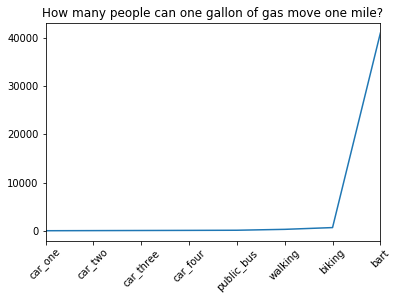

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

transported_people_one_gallon_of_gas_dict = {'car_one': 24, 'car_two': 48, 'car_three': 72, 'car_four': 96, 'public_bus': 125, 'bart': 40992, 'biking': 676.2, 'walking': 310}

transported_people_one_gallon_of_gas = pd.Series(transported_people_one_gallon_of_gas_dict)

transported_people_one_gallon_of_gas.sort_values().plot(title = 'How many people can one gallon of gas move one mile?', rot = 45)


this is crazy how much omre fuel efficient the BART is! (it is more fuel efficient than walking!!!! Or biking!!!) This is partly because of the opportune location it is in... It can move plenty of people for a low cost of energy, and this is what makes trains so great. If a train were running with only, say 2 people on it, and the train still gets 224 mpg, then it would be able to take 224 * 2 = 448 people one mile. This is still almost as good as biking! So I suppose that even without a large amount of people, trains are still very fuel efficient.

Because trains have low friction due to the tracks, and creates a wind tunnel (making air resistance minimal for its size), this allows for great fuel efficiency, and the ability to pack a lot of people on at once. 

# A VERY IMPORTANT NOTE

Just because BART is more energy efficient than say, walking for instance, this does not mean that the carbon footprint of walking is larger than BART's. The energy intake for walking is food, which can be produced and grown in ways that have a low carbon footprint (or can have a larger one, depending on how the food is processed/transported/certain ingredients). The energy that BART uses is not food, but electricity. The point of this project is not to say that people should not walk or bike, and take the BART wherever they can, but it is to show how energy efficient trains, including BART are, especially when transporting a large amount of people in a highly populated area. The energy comparison becomes more relevant when you compare trains to cars. Both can run on carbon based energy sources, and the lesser of the two evils, is most definitely trains. This is the point I am aiming to make.